In [1]:
# Import the relevant modules
import numpy as np
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.util as cutil
from scipy.stats import pearsonr, mstats, ttest_rel, ttest_ind, ttest_1samp
from sklearn.utils import resample
# import the datetime library
import datetime

In [2]:
# Import dictionaries and functions
import dictionaries as dic
import functions as fct

In [3]:
x = 252/4
print(x)

63.0


In [4]:
# Load the data using the load_data function
psl_data = fct.load_data(dic.ERA5_psl_global_path, dic.psl)
sfc_wind_data = fct.load_data(dic.ERA5_tas_wind_global_path, dic.sfc_wind)
tas_data = fct.load_data(dic.ERA5_tas_wind_global_path, dic.tas)

In [5]:
print(np.shape(psl_data))
print(np.shape(sfc_wind_data))
print(np.shape(tas_data))

(252, 721, 1440)
(252, 721, 1440)
(252, 721, 1440)


In [6]:
#psl_data.compute()
psl_data

<xarray.DataArray 'var151' (time: 252, lat: 721, lon: 1440)>
dask.array<open_dataset-751e45ec6dc273ec8489b1add86ba319var151, shape=(252, 721, 1440), dtype=float32, chunksize=(100, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    table:    128

In [7]:
# fct.test_constrain(psl_data)

In [8]:
# First we calculate a normalised index for the NAO
# Using the psl data
norm_NAO_index = fct.NAO_index(psl_data, dic.azores_grid, dic.iceland_grid)

shifted data <xarray.DataArray 'var151' (time: 252, lat: 721, lon: 1440)>
dask.array<rechunk-merge, shape=(252, 721, 1440), dtype=float32, chunksize=(100, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    table:    128
yearly mean <xarray.DataArray 'var151' (year: 63, lat: 721, lon: 1440)>
dask.array<stack, shape=(63, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * year     (year) int64 1960 1961 1962 1963 1964 ... 2018 2019 2020 2021 2022


In [9]:
print(np.shape(norm_NAO_index))
print(norm_NAO_index.compute())

(63,)
<xarray.DataArray 'var151' (year: 63)>
array([-0.39604822, -0.5935866 , -2.0237846 , -0.9651484 , -1.3000413 ,
       -1.2071096 ,  0.01384594, -0.57717377, -2.0052412 , -1.1056162 ,
       -0.08546809,  0.5301563 ,  0.5590905 ,  0.97532797, -0.1527152 ,
        0.25151664, -1.1410105 , -0.69744414, -0.33849123, -0.25208762,
       -0.4050281 ,  0.8500666 ,  0.66057414,  0.91817963, -1.5192463 ,
        0.7138211 , -1.4327649 ,  0.28476077,  1.3188993 ,  2.2017026 ,
        0.16018042,  1.0038828 ,  1.2611574 ,  1.2554368 ,  0.5030026 ,
       -1.4942038 ,  0.3956718 ,  0.25739297,  0.9540214 ,  0.24023096,
       -1.3124167 ,  0.01632685,  0.0480046 ,  0.311934  , -0.68957335,
       -0.09545981,  0.7533891 ,  0.63890755, -0.600037  , -2.677469  ,
        0.8102943 ,  0.643344  , -0.6649394 ,  1.4759065 ,  1.964927  ,
        0.8095549 ,  0.40042934,  0.30593115,  0.47215182,  1.534952  ,
       -0.57151145, -0.01892146, -1.1724353 ], dtype=float32)
Coordinates:
  * year     (ye

In [10]:
# Now we select the NAO anomalies
# from the normalised NAO index
pos_anom, pos_anom_ind, pos_anom_dates, neg_anom, neg_anom_ind, neg_anom_dates \
    = fct.select_NAO_anomalies(norm_NAO_index) 

In [11]:
print(np.shape(pos_anom))
# print(pos_anom)
print(np.shape(pos_anom_ind))
print(pos_anom_ind)
print(np.shape(pos_anom_dates))
print(pos_anom_dates)
print(np.shape(neg_anom))
# print(neg_anom)
print(np.shape(neg_anom_ind))
print(neg_anom_ind)
print(np.shape(neg_anom_dates))
print(neg_anom_dates)

(8,)
(8,)
[1988 1989 1991 1992 1993 2013 2014 2019]
(8,)
DatetimeIndex(['1970-01-01 00:00:00.000001988',
               '1970-01-01 00:00:00.000001989',
               '1970-01-01 00:00:00.000001991',
               '1970-01-01 00:00:00.000001992',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000002013',
               '1970-01-01 00:00:00.000002014',
               '1970-01-01 00:00:00.000002019'],
              dtype='datetime64[ns]', freq=None)
(12,)
(12,)
[1962 1964 1965 1968 1969 1976 1984 1986 1995 2000 2009 2022]
(12,)
DatetimeIndex(['1970-01-01 00:00:00.000001962',
               '1970-01-01 00:00:00.000001964',
               '1970-01-01 00:00:00.000001965',
               '1970-01-01 00:00:00.000001968',
               '1970-01-01 00:00:00.000001969',
               '1970-01-01 00:00:00.000001976',
               '1970-01-01 00:00:00.000001984',
               '1970-01-01 00:00:00.000001986',
               '1970-01-01 00:00:00.000001995

In [12]:
# Now we select the sfc wind anomalies
# from the sfc wind data
pos_anom_sfc_wind, neg_anom_sfc_wind = \
    fct.select_anomaly_time_series(pos_anom_ind, pos_anom_dates, neg_anom_ind, \
                                   neg_anom_dates, sfc_wind_data)

# Now we select the tas anomalies
# from the tas data
pos_anom_tas, neg_anom_tas = \
    fct.select_anomaly_time_series(pos_anom_ind, pos_anom_dates, neg_anom_ind, \
                                      neg_anom_dates, tas_data)


positive NAO anom indicies [1988 1989 1991 1992 1993 2013 2014 2019]
negative NAO anom indicies [1962 1964 1965 1968 1969 1976 1984 1986 1995 2000 2009 2022]
positive NAO anom indicies [1988 1989 1991 1992 1993 2013 2014 2019]
negative NAO anom indicies [1962 1964 1965 1968 1969 1976 1984 1986 1995 2000 2009 2022]


In [13]:
print(np.shape(pos_anom_sfc_wind))
print(np.shape(neg_anom_sfc_wind))
print(np.shape(pos_anom_tas))
print(np.shape(neg_anom_tas))

(8, 721, 1440)
(12, 721, 1440)
(8, 721, 1440)
(12, 721, 1440)


In [14]:
pos_anom_sfc_wind.latitude

<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [15]:
pos_anom_sfc_wind.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    units:      degrees_east
    long_name:  longitude

In [16]:
pos_anom_sfc_wind.year

<xarray.DataArray 'year' (year: 8)>
array([1988, 1989, 1991, 1992, 1993, 2013, 2014, 2019])
Coordinates:
  * year     (year) int64 1988 1989 1991 1992 1993 2013 2014 2019

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil

# Now constrain both of these to the North Atlantic region
# using the lat_range and lon_range variables
pos_anom_sfc_wind_NA = fct.constrain_to_north_atlantic(pos_anom_sfc_wind, \
                                                    dic.north_atlantic_grid)
pos_anom_sfc_wind_NA_roll = fct.constrain_to_north_atlantic(pos_anom_sfc_wind, \
                                                    dic.north_atlantic_grid_roll)
neg_anom_sfc_wind_NA = fct.constrain_to_north_atlantic(neg_anom_sfc_wind, \
                                                    dic.north_atlantic_grid)

pos_anom_tas_NA = fct.constrain_to_north_atlantic(pos_anom_tas, \
                                                    dic.north_atlantic_grid)
neg_anom_tas_NA = fct.constrain_to_north_atlantic(neg_anom_tas, \
                                                    dic.north_atlantic_grid)


In [18]:
print(np.shape(pos_anom_sfc_wind_NA))
print(np.shape(neg_anom_sfc_wind_NA))
print(np.shape(pos_anom_tas_NA))
print(np.shape(neg_anom_tas_NA))

(402, 321)
(402, 321)
(402, 321)
(402, 321)


In [19]:
print(np.shape(pos_anom_sfc_wind_NA))

(402, 321)


In [20]:
# print(neg_anom_sfc_wind_NA['si10'])

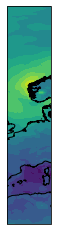

In [21]:
import cartopy.crs as ccrs

# plot this raw for testing purposes
sfc_wind=pos_anom_sfc_wind_NA
lats=pos_anom_sfc_wind_NA['latitude']
lons=pos_anom_sfc_wind_NA['longitude']

# rolled data
sfc_wind=pos_anom_sfc_wind_NA_roll
lats=pos_anom_sfc_wind_NA_roll['latitude']
lons=pos_anom_sfc_wind_NA_roll['longitude']

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sfc_wind, 20,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

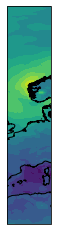

In [22]:
import cartopy.crs as ccrs

# plot this raw for testing purposes
sfc_wind=pos_anom_sfc_wind_NA_roll
lats=pos_anom_sfc_wind_NA_roll['latitude']
lons=pos_anom_sfc_wind_NA_roll['longitude']


ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sfc_wind, 20,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

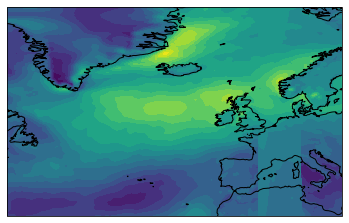

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Concatenate the normal and roll data along the time dimension
sfc_wind_combined = xr.concat([pos_anom_sfc_wind_NA, pos_anom_sfc_wind_NA_roll], dim='latitude')

# Now plot the combined data
lats = sfc_wind_combined['latitude']
lons = sfc_wind_combined['longitude']
sfc_wind = sfc_wind_combined  # Using the combined data

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sfc_wind, 20,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()


In [24]:
pos_anom_sfc_wind_NA.longitude.values

array([0.0000e+00, 2.5000e-01, 5.0000e-01, 7.5000e-01, 1.0000e+00,
       1.2500e+00, 1.5000e+00, 1.7500e+00, 2.0000e+00, 2.2500e+00,
       2.5000e+00, 2.7500e+00, 3.0000e+00, 3.2500e+00, 3.5000e+00,
       3.7500e+00, 4.0000e+00, 4.2500e+00, 4.5000e+00, 4.7500e+00,
       5.0000e+00, 5.2500e+00, 5.5000e+00, 5.7500e+00, 6.0000e+00,
       6.2500e+00, 6.5000e+00, 6.7500e+00, 7.0000e+00, 7.2500e+00,
       7.5000e+00, 7.7500e+00, 8.0000e+00, 8.2500e+00, 8.5000e+00,
       8.7500e+00, 9.0000e+00, 9.2500e+00, 9.5000e+00, 9.7500e+00,
       1.0000e+01, 1.0250e+01, 1.0500e+01, 1.0750e+01, 1.1000e+01,
       1.1250e+01, 1.1500e+01, 1.1750e+01, 1.2000e+01, 1.2250e+01,
       1.2500e+01, 1.2750e+01, 1.3000e+01, 1.3250e+01, 1.3500e+01,
       1.3750e+01, 1.4000e+01, 1.4250e+01, 1.4500e+01, 1.4750e+01,
       1.5000e+01, 1.5250e+01, 1.5500e+01, 1.5750e+01, 1.6000e+01,
       1.6250e+01, 1.6500e+01, 1.6750e+01, 1.7000e+01, 1.7250e+01,
       1.7500e+01, 1.7750e+01, 1.8000e+01, 1.8250e+01, 1.8500e

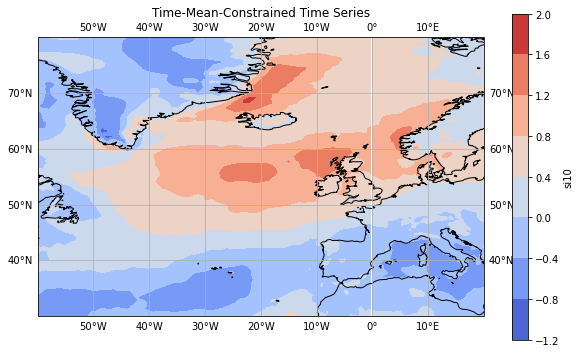

In [25]:
# Now we plot the sfc wind anomalies
# for the positive NAO phase
fct.plot_time_mean_constrained(pos_anom_sfc_wind_NA, dic.sfc_wind)

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.util as cutil

# lon,lat = np.meshgrid(pos_anom_sfc_wind_NA.longitude, pos_anom_sfc_wind_NA.latitude)
# data_add, lons_add = cutil.add_cyclic_point(pos_anom_sfc_wind_NA, coord=lons)

In [27]:
print(np.shape(pos_anom_sfc_wind_NA))

(402, 321)


In [28]:
print(pos_anom_sfc_wind_NA[0,76:84])

<xarray.DataArray 'si10' (longitude: 8)>
dask.array<getitem, shape=(8,), dtype=float32, chunksize=(8,), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 19.0 19.25 19.5 19.75 20.0 300.0 300.2 300.5
    latitude   float64 80.0


In [29]:
import numpy as np

# Calculate the differences between consecutive longitude values
diff_longitude = np.diff(pos_anom_sfc_wind_NA.longitude)

# Check if all the differences are the same (equally spaced)
is_equally_spaced = np.allclose(diff_longitude, diff_longitude[0])

# If not equally spaced, find the indices where the differences are not the same
if not is_equally_spaced:
    unequal_spaced_indices = np.where(diff_longitude != diff_longitude[0])[0]
    print("Indices where longitude values are not equally spaced:", unequal_spaced_indices)
else:
    print("Longitude values are equally spaced.")


Indices where longitude values are not equally spaced: [80]


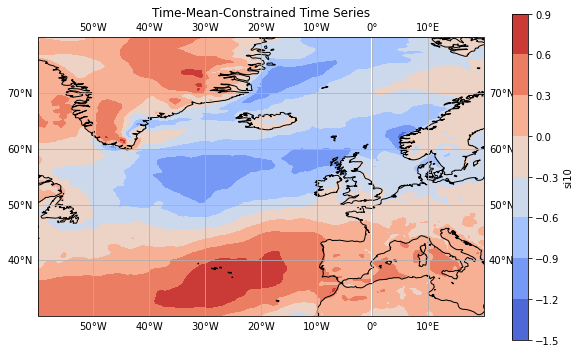

In [30]:
# for the negative NAO phase
fct.plot_time_mean_constrained(neg_anom_sfc_wind_NA, dic.sfc_wind)

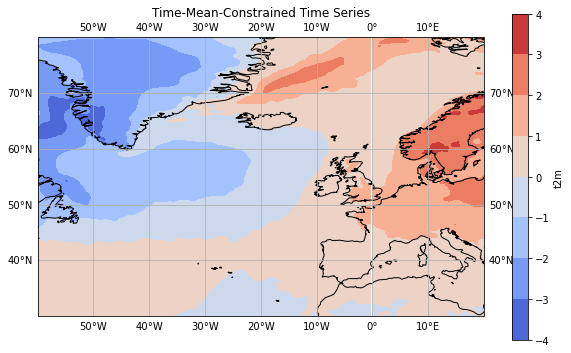

In [31]:
# for temperature
fct.plot_time_mean_constrained(pos_anom_tas_NA, dic.tas)

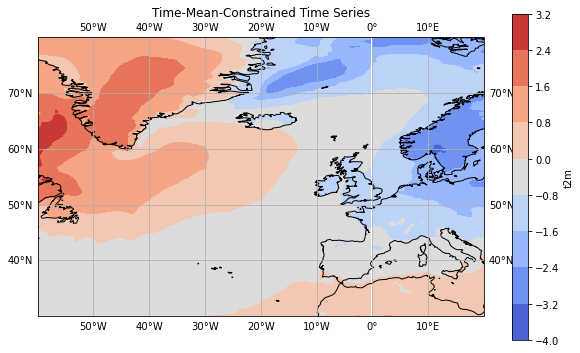

In [32]:
fct.plot_time_mean_constrained(neg_anom_tas_NA, dic.tas)

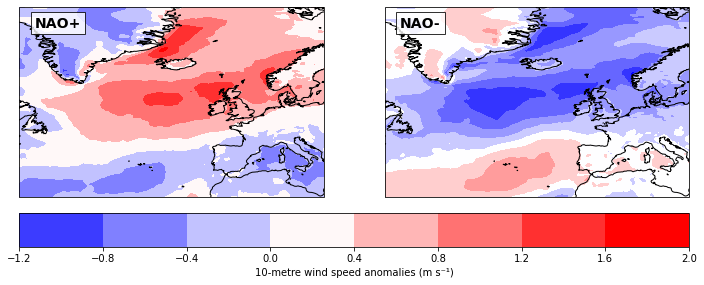

In [33]:
fct.plot_time_mean_constrained_subplots(pos_anom_sfc_wind_NA, neg_anom_sfc_wind_NA, dic.sfc_wind_label, dic.sfc_wind_units)

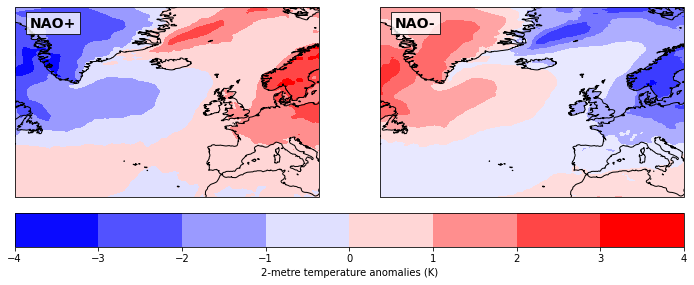

In [34]:
fct.plot_time_mean_constrained_subplots(pos_anom_tas_NA, neg_anom_tas_NA, dic.tas_label, dic.tas_units)
